In [1]:
pip install numpy pandas matplotlib seaborn scipy scikit-learn eli5 librosa


  Using cached eli5-0.13.0.tar.gz (216 kB)
  Using cached librosa-0.10.1-py3-none-any.whl (253 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
  Using cached pooch-1.8.0-py3-none-any.whl (62 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
  Using cached platformdirs-4.0.0-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pycparser in c:\users\38555\anaconda\lib\site-packages (from cffi>=1.0->soundfile>=0.12.1->librosa) (2.20)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires Jinja2<3.0.0, but you have jinja2 3.1.2 which is incompatible.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.1.3 which is incompatible.



  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=d08d2017a9d0f2933d35a35399d160e97a53d54f45f2be534fb49eed3baebb3a
  Stored in directory: c:\users\38555\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import uniform, randint
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
from sklearn.linear_model import LogisticRegression
import sklearn.ensemble as ske
import eli5
from eli5.sklearn import PermutationImportance
from pprint import pprint
import random
import librosa, IPython
import librosa.display as lplt
seed = 15
np.random.seed(seed)

In [5]:
df = pd.read_csv('./archive/Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [6]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Positive and Negative samples


,index,label
0,blues,1000
1,jazz,1000
2,metal,1000
3,pop,1000
4,reggae,1000
5,disco,999
6,classical,998
7,hiphop,998
8,rock,998
9,country,997


# Data Processing, use LibROSA

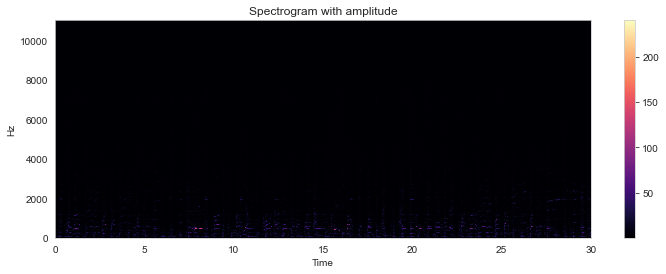

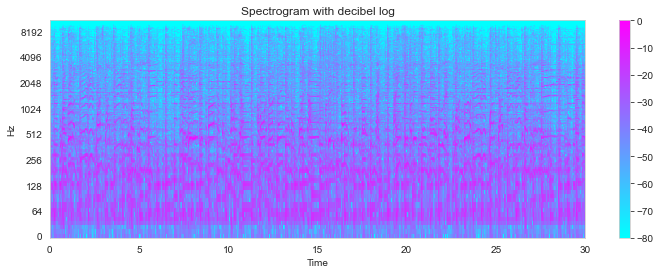

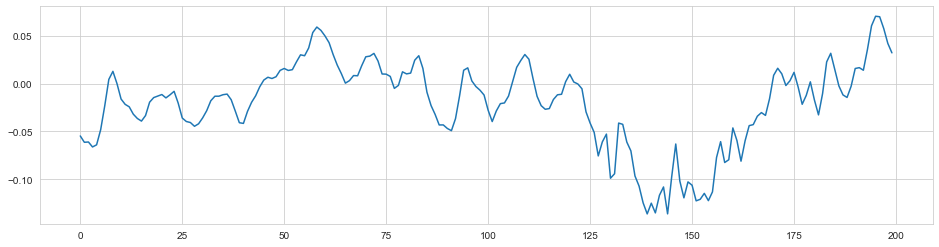

In [8]:
audio_fp = './archive/Data/genres_original/blues/blues.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)

# Default FFT window size
n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

# plot zoomed audio wave 
start = 1000
end = 1200
plt.figure(figsize=(16,4))
plt.plot(audio_data[start:end])
plt.show()

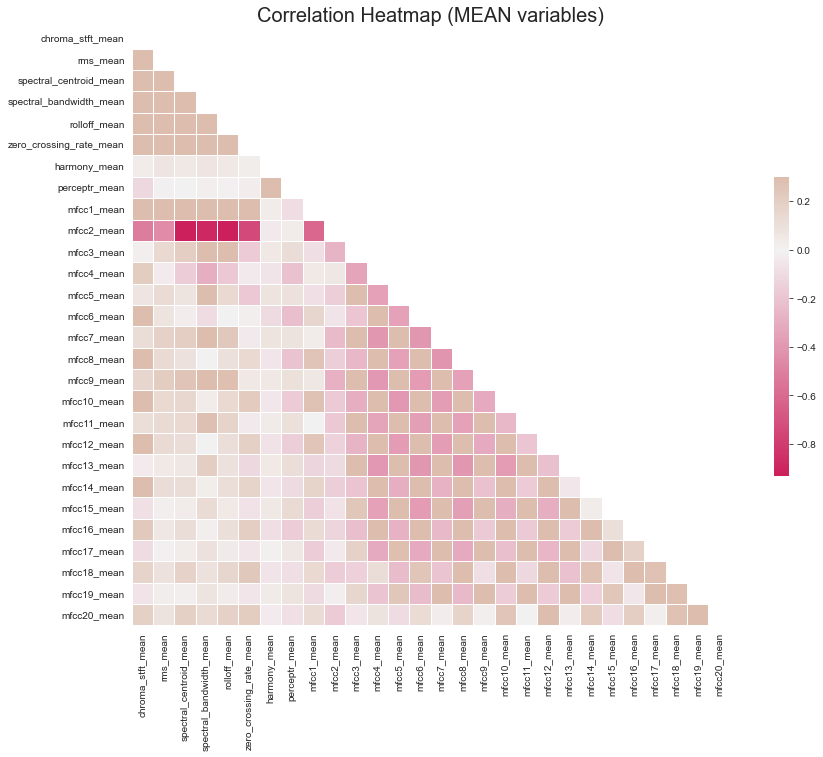

In [9]:
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

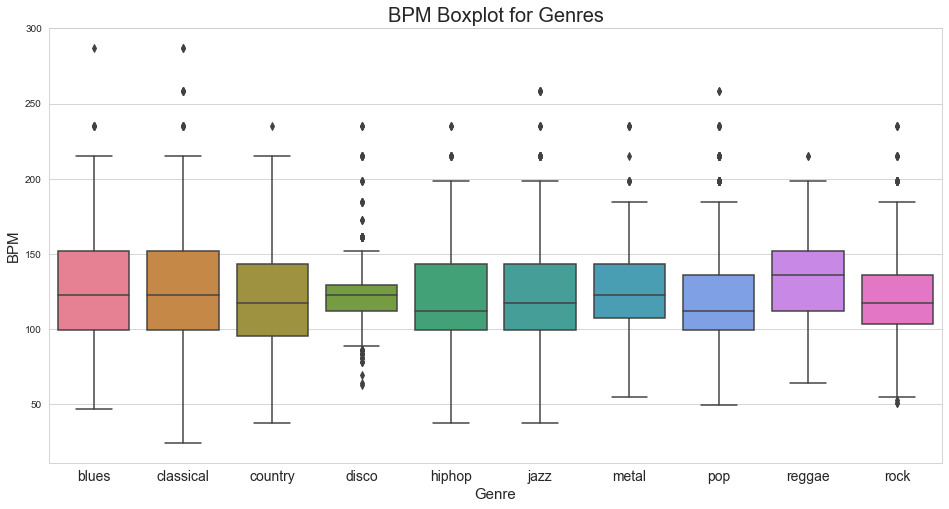

In [10]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

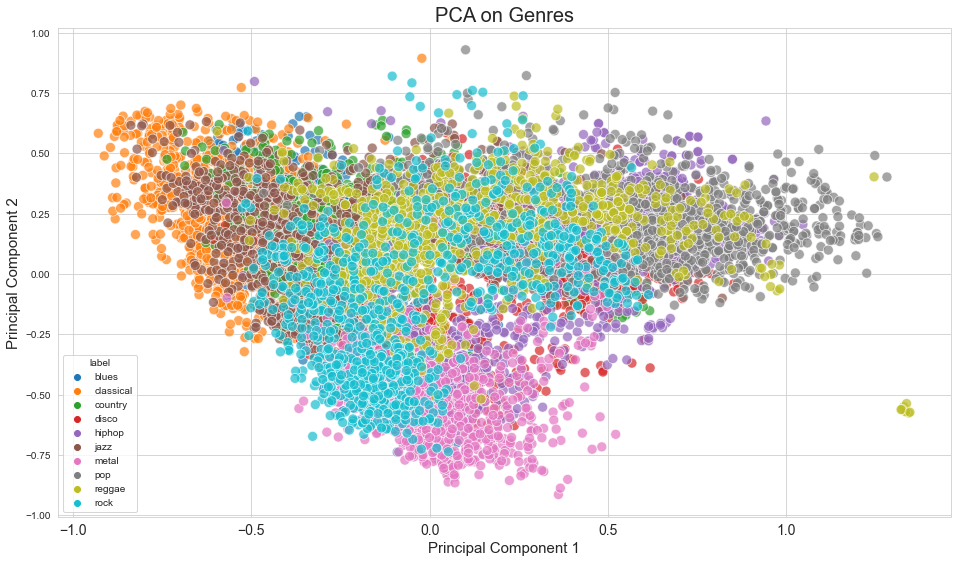

In [11]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")


# Split Dataset


In [20]:
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

df.label = [label_index[l] for l in df.label]
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

# remove irrelevant columns
df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}


In [21]:
def predictProba(clf, X, dev=False):
    y_true = y_train
    if dev:
        X = X_dev[X.columns]
        y_true = y_dev
    y_pred_proba_X = clf.predict_proba(X)
    y_pred_X = clf.predict(X)
    fig, ax = plt.subplots(figsize=(6, 6))
    
    class_labels = [
    'mfcc1_mean', 'spectral_centroid_mean', 'rms_mean', 'spectral_bandwidth_mean',
    'zero_crossing_rate_mean', 'rolloff_mean', 'perceptr_var', 'mfcc3_mean',
    'mfcc2_mean', 'spectral_centroid_var'
    ]
    
    skm.plot_confusion_matrix(clf, X, y_true, display_labels=class_labels, cmap=plt.cm.Blues, xticks_rotation=90, ax=ax)
    plt.show()
    print(skm.classification_report(y_true, y_pred_X, digits=3))
    print("=====================================================")

In [30]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)


# Logistics Regression

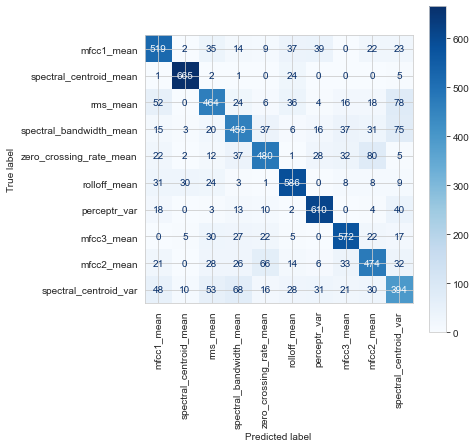

              precision    recall  f1-score   support

           0      0.714     0.741     0.727       700
           1      0.927     0.953     0.940       698
           2      0.692     0.665     0.678       698
           3      0.683     0.657     0.670       699
           4      0.742     0.687     0.713       699
           5      0.793     0.837     0.814       700
           6      0.831     0.871     0.851       700
           7      0.796     0.817     0.806       700
           8      0.688     0.677     0.683       700
           9      0.581     0.564     0.572       699

    accuracy                          0.747      6993
   macro avg      0.745     0.747     0.745      6993
weighted avg      0.745     0.747     0.745      6993



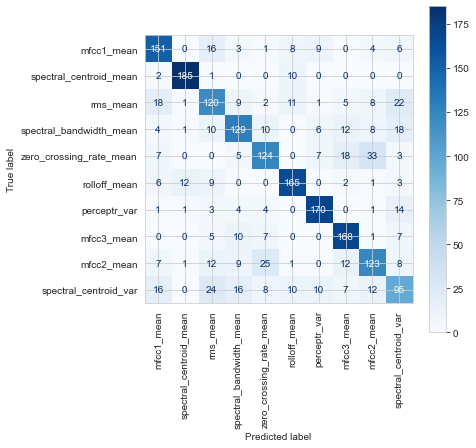

              precision    recall  f1-score   support

           0      0.712     0.763     0.737       198
           1      0.920     0.934     0.927       198
           2      0.600     0.609     0.605       197
           3      0.697     0.652     0.674       198
           4      0.685     0.629     0.656       197
           5      0.805     0.833     0.819       198
           6      0.837     0.859     0.848       198
           7      0.750     0.848     0.796       198
           8      0.644     0.621     0.632       198
           9      0.540     0.480     0.508       198

    accuracy                          0.723      1978
   macro avg      0.719     0.723     0.720      1978
weighted avg      0.719     0.723     0.720      1978



In [31]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictProba(lr, X_train)

predictProba(lr, X_train, True)

In [34]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


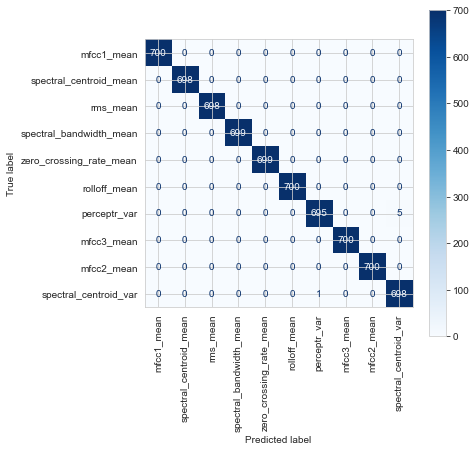

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       700
           1      1.000     1.000     1.000       698
           2      1.000     1.000     1.000       698
           3      1.000     1.000     1.000       699
           4      1.000     1.000     1.000       699
           5      1.000     1.000     1.000       700
           6      0.999     0.993     0.996       700
           7      1.000     1.000     1.000       700
           8      1.000     1.000     1.000       700
           9      0.993     0.999     0.996       699

    accuracy                          0.999      6993
   macro avg      0.999     0.999     0.999      6993
weighted avg      0.999     0.999     0.999      6993



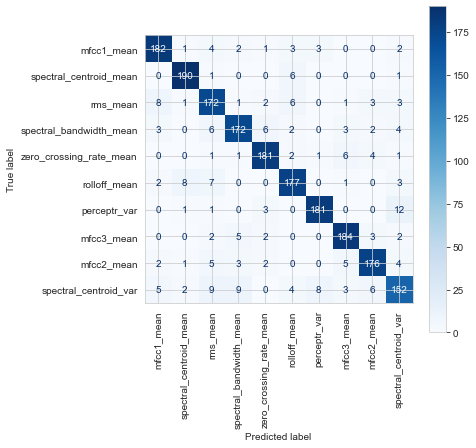

              precision    recall  f1-score   support

           0      0.901     0.919     0.910       198
           1      0.931     0.960     0.945       198
           2      0.827     0.873     0.849       197
           3      0.891     0.869     0.880       198
           4      0.919     0.919     0.919       197
           5      0.885     0.894     0.889       198
           6      0.938     0.914     0.926       198
           7      0.906     0.929     0.918       198
           8      0.907     0.889     0.898       198
           9      0.826     0.768     0.796       198

    accuracy                          0.893      1978
   macro avg      0.893     0.893     0.893      1978
weighted avg      0.893     0.893     0.893      1978



In [35]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(n_estimators=100, random_state=seed)
xgbc.fit(X_train, y_train)
predictProba(xgbc, X_train)
predictProba(xgbc, X_train, True)

Adaboost

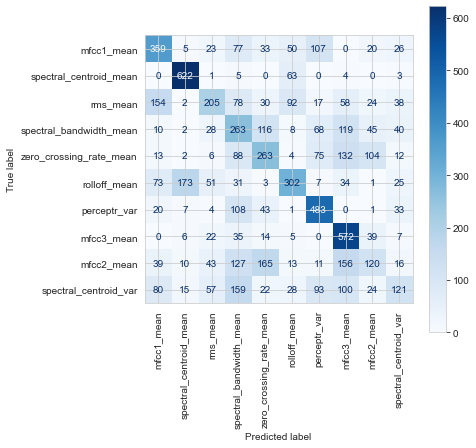

              precision    recall  f1-score   support

           0      0.480     0.513     0.496       700
           1      0.737     0.891     0.807       698
           2      0.466     0.294     0.360       698
           3      0.271     0.376     0.315       699
           4      0.382     0.376     0.379       699
           5      0.534     0.431     0.477       700
           6      0.561     0.690     0.619       700
           7      0.487     0.817     0.610       700
           8      0.317     0.171     0.223       700
           9      0.377     0.173     0.237       699

    accuracy                          0.473      6993
   macro avg      0.461     0.473     0.452      6993
weighted avg      0.461     0.473     0.452      6993



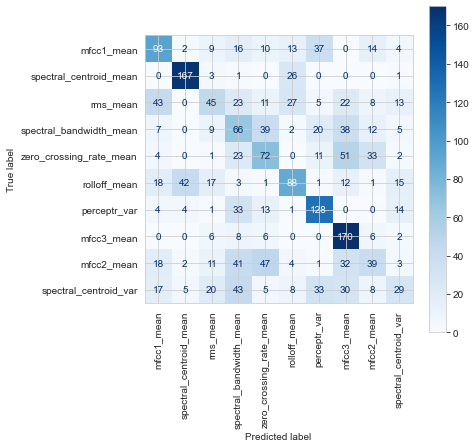

              precision    recall  f1-score   support

           0      0.456     0.470     0.463       198
           1      0.752     0.843     0.795       198
           2      0.369     0.228     0.282       197
           3      0.257     0.333     0.290       198
           4      0.353     0.365     0.359       197
           5      0.521     0.444     0.480       198
           6      0.542     0.646     0.590       198
           7      0.479     0.859     0.615       198
           8      0.322     0.197     0.245       198
           9      0.330     0.146     0.203       198

    accuracy                          0.453      1978
   macro avg      0.438     0.453     0.432      1978
weighted avg      0.438     0.453     0.432      1978



In [36]:
abc = ske.AdaBoostClassifier(n_estimators=100, random_state=seed)
abc.fit(X_train, y_train)
predictProba(abc, X_train)

predictProba(abc, X_train, True)